https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#exercises

In [3]:
import zipfile

with zipfile.ZipFile("/content/BitCoin - Historical prices.zip", "r") as z:
  z.extractall("bitcoin_historical_data/")

In [4]:
data_path = "/content/bitcoin_historical_data/coin_Bitcoin.csv"
import pandas as pd
bitcoin_df = pd.read_csv(data_path)
print(bitcoin_df.head(15))
bitcoin_df = bitcoin_df.set_index("Date")

    SNo     Name Symbol  ...       Close  Volume     Marketcap
0     1  Bitcoin    BTC  ...  144.539993     0.0  1.603769e+09
1     2  Bitcoin    BTC  ...  139.000000     0.0  1.542813e+09
2     3  Bitcoin    BTC  ...  116.989998     0.0  1.298955e+09
3     4  Bitcoin    BTC  ...  105.209999     0.0  1.168517e+09
4     5  Bitcoin    BTC  ...   97.750000     0.0  1.085995e+09
5     6  Bitcoin    BTC  ...  112.500000     0.0  1.250317e+09
6     7  Bitcoin    BTC  ...  115.910004     0.0  1.288693e+09
7     8  Bitcoin    BTC  ...  112.300003     0.0  1.249023e+09
8     9  Bitcoin    BTC  ...  111.500000     0.0  1.240594e+09
9    10  Bitcoin    BTC  ...  113.566002     0.0  1.264049e+09
10   11  Bitcoin    BTC  ...  112.669998     0.0  1.254535e+09
11   12  Bitcoin    BTC  ...  117.199997     0.0  1.305479e+09
12   13  Bitcoin    BTC  ...  115.242996     0.0  1.284207e+09
13   14  Bitcoin    BTC  ...  115.000000     0.0  1.281983e+09
14   15  Bitcoin    BTC  ...  117.980003     0.0  1.315

In [5]:
bitcoin_df = bitcoin_df.loc[:,bitcoin_df.columns=="Close" ]
bitcoin_df 

Close
Date                             
2013-04-29 23:59:59    144.539993
2013-04-30 23:59:59    139.000000
2013-05-01 23:59:59    116.989998
2013-05-02 23:59:59    105.209999
2013-05-03 23:59:59     97.750000
...                           ...
2021-07-02 23:59:59  33897.048590
2021-07-03 23:59:59  34668.548402
2021-07-04 23:59:59  35287.779766
2021-07-05 23:59:59  33746.002456
2021-07-06 23:59:59  34235.193451

[2991 rows x 1 columns]

In [6]:
bitcoin_df = bitcoin_df.rename({"Close": "Price"}, axis=1)
bitcoin_df

Price
Date                             
2013-04-29 23:59:59    144.539993
2013-04-30 23:59:59    139.000000
2013-05-01 23:59:59    116.989998
2013-05-02 23:59:59    105.209999
2013-05-03 23:59:59     97.750000
...                           ...
2021-07-02 23:59:59  33897.048590
2021-07-03 23:59:59  34668.548402
2021-07-04 23:59:59  35287.779766
2021-07-05 23:59:59  33746.002456
2021-07-06 23:59:59  34235.193451

[2991 rows x 1 columns]

In [7]:
timesteps = bitcoin_df.index.to_numpy()
prices = bitcoin_df["Price"].to_numpy()

len(timesteps), len(prices)

(2991, 2991)

In [8]:
 split_index = int(0.8 * len(bitcoin_df))
 x_train, y_train = timesteps[:split_index], prices[:split_index]
 x_test, y_test = timesteps[split_index:], prices[split_index:]

 len(x_train), len(y_train), len(x_test), len(y_test)

(2392, 2392, 599, 599)

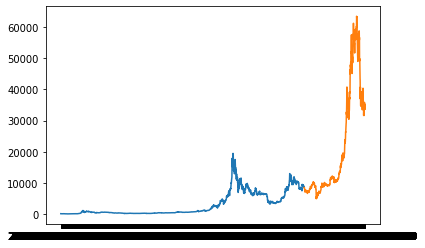

In [10]:
import matplotlib.pyplot as plt

plt.plot(x_train, y_train)
plt.plot(x_test, y_test)

In [17]:
WINDOW_SIZE = 7
HORIZON = 1

from tensorflow.keras.preprocessing import timeseries_dataset_from_array
X_train_input = y_train[:-HORIZON]
X_train_target = y_train[WINDOW_SIZE:] 
train_dataset = timeseries_dataset_from_array(X_train_input, X_train_target, sequence_length=WINDOW_SIZE)

X_test_input = y_test[:-HORIZON]
X_test_target = y_test[WINDOW_SIZE:] 
test_dataset = timeseries_dataset_from_array(X_test_input, X_test_target, sequence_length=WINDOW_SIZE)
# for batch in dataset:
#   print(batch)

train_dataset, test_dataset

(<BatchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.float64)>,
 <BatchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.float64)>)

In [32]:
from tensorflow.keras import losses, optimizers, layers, Sequential
import tensorflow as tf
import numpy as np

model_1 = Sequential([
    layers.InputLayer(input_shape=(WINDOW_SIZE,), name ="input_layer"),
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.LSTM(128, activation="relu"),
    layers.Dense(HORIZON, name="output_layer")
])

model_1.compile(loss=losses.mean_absolute_error,
                optimizer=optimizers.Adam())

model_1.fit(train_dataset,
            epochs=100,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.ModelCheckpoint("checkpoint/model_1", save_best_only=True)]
            )

INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


INFO:tensorflow:Assets written to: checkpoint/model_1/assets


In [33]:
model_1.evaluate(test_dataset)

5/5 [==============================] - 0s 21ms/step - loss: 824.8768


824.8767700195312

In [34]:
model_1.load_weights("checkpoint/model_1")
model_1.evaluate(test_dataset)

5/5 [==============================] - 0s 26ms/step - loss: 820.6535


820.6535034179688

In [38]:
model_1.input_shape, y_test.shape

((None, 7), (599,))

In [46]:
input_data = np.expand_dims(np.array(y_test[:WINDOW_SIZE]), axis=0)
input_data.shape

(1, 7)

In [49]:
model_1.predict(input_data), y_test[:WINDOW_SIZE+1]

(array([[7546.6626]], dtype=float32),
 array([8550.76055694, 8577.9757816 , 8309.28598342, 8206.14591807,
        8027.26824331, 7642.74994484, 7296.57756843, 7397.7968154 ]))

In [68]:
x = np.array(prices)

def predict(model, input_data, horizon):
  preds = input_data.tolist()
  for i in range(horizon):
    input_data = np.array(preds[-WINDOW_SIZE:])
    res = model.predict(np.expand_dims(input_data, axis=0))
    # res = np.squeeze(res) 
    preds.append(res[0][0])
  return preds
  
preds = predict(model_1, np.squeeze(x), len(y_test)- WINDOW_SIZE)

len(preds), len(x)

(3583, 2991)

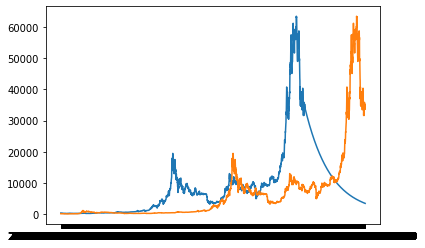

In [71]:
plt.plot(timesteps, preds[len(y_test)- WINDOW_SIZE:]) 
plt.plot(timesteps, x) 
plt.show() 

In [77]:
timesteps[0]

'2013-04-29 23:59:59'

In [87]:
from datetime import date, timedelta, datetime


print(timesteps[-10:])
y = timesteps
y = np.append(y, [datetime.strftime(datetime.strptime(timesteps[-1], "%Y-%m-%d %H:%M:%S") + timedelta(days=d+1), "%Y-%m-%d %H:%M:%S") for d in range(len(y_test)- WINDOW_SIZE)])
# print(datetime.strftime(datetime.strptime(timesteps[0], "%Y-%m-%d %H:%M:%S"), "%Y-%m-%d %H:%M:%S"))
# print(datetime.strftime(datetime.strptime(timesteps[0], "%Y-%m-%d %H:%M:%S") + timedelta(days=1), "%Y-%m-%d %H:%M:%S"))
print(y[-10:])

['2021-06-27 23:59:59' '2021-06-28 23:59:59' '2021-06-29 23:59:59'
 '2021-06-30 23:59:59' '2021-07-01 23:59:59' '2021-07-02 23:59:59'
 '2021-07-03 23:59:59' '2021-07-04 23:59:59' '2021-07-05 23:59:59'
 '2021-07-06 23:59:59']
['2023-02-09 23:59:59' '2023-02-10 23:59:59' '2023-02-11 23:59:59'
 '2023-02-12 23:59:59' '2023-02-13 23:59:59' '2023-02-14 23:59:59'
 '2023-02-15 23:59:59' '2023-02-16 23:59:59' '2023-02-17 23:59:59'
 '2023-02-18 23:59:59']


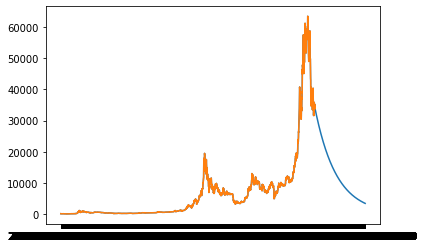

In [88]:
plt.plot(y, preds) 
# plt.plot(timesteps, x) 
plt.show() 

In [91]:
x = np.array(prices)

def predict_v2(model, input_data, targets, horizon):
  preds = input_data.tolist()
  for i in range(horizon):
    # do the prediction
    input_data = np.array(preds[-WINDOW_SIZE:])
    res = model.predict(np.expand_dims(input_data, axis=0))
    preds.append(res[0][0])

    print("train the model again!") 
    x_train = preds[:-HORIZON]
    targets = np.array(preds[WINDOW_SIZE:]) 
    train_dataset = timeseries_dataset_from_array(x_train, targets, sequence_length=WINDOW_SIZE)
    model.fit(train_dataset,
              epochs=20,
              callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor="loss", restore_best_weights=True, verbose=1)])
    
  return preds
  
preds = predict_v2(model_1, np.squeeze(x), np.squeeze(x[WINDOW_SIZE:]), 20)

len(preds), len(x)

train the model again!
Epoch 1/20
24/24 [==============================] - 1s 25ms/step - loss: 319.5997
Epoch 2/20
24/24 [==============================] - 1s 24ms/step - loss: 261.0158
Epoch 3/20
24/24 [==============================] - 1s 26ms/step - loss: 274.4346
Epoch 4/20
24/24 [==============================] - 1s 26ms/step - loss: 296.7465
Epoch 5/20
24/24 [==============================] - 1s 25ms/step - loss: 356.0059
Epoch 6/20
24/24 [==============================] - 1s 24ms/step - loss: 239.6870
Epoch 7/20
24/24 [==============================] - 1s 26ms/step - loss: 237.9219
Epoch 8/20
24/24 [==============================] - 1s 24ms/step - loss: 238.8697
Epoch 9/20
24/24 [==============================] - 1s 24ms/step - loss: 239.0312
Epoch 10/20
24/24 [==============================] - 1s 25ms/step - loss: 239.3763
Epoch 11/20
24/24 [==============================] - 1s 24ms/step - loss: 240.0739
Epoch 12/20
24/24 [==============================] - 1s 24ms/step - loss:

(3011, 2991)

In [93]:
len(y), len(preds), len(y) - len(preds)

(3583, 3011, 572)

In [95]:
y_20 = y[:-572]
len(y_20), len(preds), len(y_20) - len(preds)

(3011, 3011, 0)

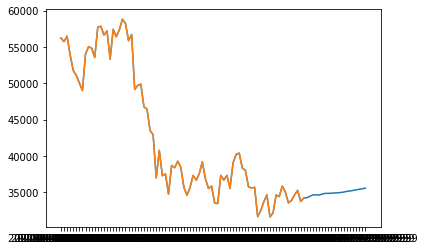

In [98]:
x_plt, y_plt = y_20[-100:], preds[-100:]
x_train_plt, y_train_plt = timesteps[-80:], prices[-80:]
plt.plot(x_plt, y_plt)
plt.plot(x_train_plt, y_train_plt)
plt.show()